In [361]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.spatial.distance import pdist, squareform
from pca import pca

In [362]:
df = pd.read_csv('countries.csv', index_col=0)
df.sample(5)


,murder,suicide,drugs,heartattack,cancer
Taiwan,26.128611,28.391364,28.590196,24.471782,29.655194
Mauritania,31.059159,15.924187,9.764971,12.850693,9.554690
Mali,7.287697,1.829871,3.113872,4.220134,8.477811
Sierra Leone,8.523894,5.680920,9.039978,22.569701,24.780276
France,5.627137,9.605127,7.866558,21.579563,28.039765


In [363]:
df.shape

(187, 5)

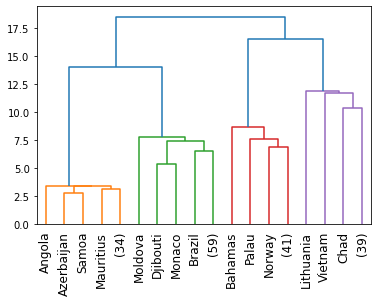

In [365]:
# hierachical clustering (single, euclidian)
single = linkage(df, method="single", metric="euclidean")
sorted_labels, indices = np.unique(df.index, return_inverse=True)
original_labels = sorted_labels[indices]
d = dendrogram(single, labels=country_name, leaf_rotation=90, truncate_mode='level', p = 4)
plt.show()

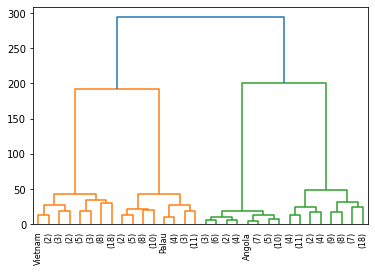

In [366]:
# hierachical clustering (ward)
ward = linkage(df, method="ward", metric="euclidean")
sorted_labels, indices = np.unique(df.index, return_inverse=True)
original_labels = sorted_labels[indices]
d = dendrogram(ward, labels=country_name, leaf_rotation=90, truncate_mode='level', p = 4)
plt.show()

In [367]:
cluster_ward = pd.DataFrame({'Country': df.index, 'Level': cut_tree(ward, height=45)[:, 0]})
cluster_ward['Level'].value_counts()
#cluster4.loc[cluster4['Level'] == 3]

3    44
1    42
2    42
0    38
4    21
Name: Level, dtype: int64

In [368]:
df_ward = df.copy()
df_ward.reset_index(inplace=True)
df_ward["Level"] = cluster_ward["Level"]
df_ward.loc[df_ward['index'] == 'Seychelles']

,index,murder,suicide,drugs,heartattack,cancer,Level
145,Seychelles,5.734242,13.630757,12.267676,27.300588,25.407068,4


In [369]:
cluster_single = pd.DataFrame({'Country': df.index, 'Level': cut_tree(single, height=11.8)[:, 0]})
cluster_single['Level'].value_counts()

2    63
3    44
1    41
0    38
4     1
Name: Level, dtype: int64

In [370]:
df_single = df.copy()
df_single.reset_index(inplace=True)
df_single["Level"] = cluster_single["Level"]
df_single.loc[df_single['index'] == 'Seychelles']

,index,murder,suicide,drugs,heartattack,cancer,Level
145,Seychelles,5.734242,13.630757,12.267676,27.300588,25.407068,2


In [371]:
print(df_ward.groupby(["Level"]).median()) #4 level

          murder    suicide      drugs  heartattack     cancer
Level                                                         
0       6.194395   2.652151   3.134723     4.036220   6.906122
1      30.507061  28.054207  24.257018    22.541906  28.281072
2       7.576009   8.971377  11.106685    22.746483  22.849058
3      25.893064  24.274342  11.380993     9.456186   6.047888
4       5.975941  10.259819  11.659077    30.101117  25.198273


In [372]:
print(df_single.groupby(["Level"]).median()) #2 level

          murder    suicide      drugs  heartattack     cancer
Level                                                         
0       6.194395   2.652151   3.134723     4.036220   6.906122
1      30.459610  28.007979  24.188962    22.398140  28.495037
2       6.460219   9.297152  11.516574    24.454325  24.543401
3      25.893064  24.274342  11.380993     9.456186   6.047888
4      40.592459  30.959009  32.181269    22.861756  17.551492


In [373]:
10.259819-9.297152

0.9626669999999997

In [384]:
df_ward.loc[df_ward['Level'] == 4]

,index,murder,suicide,drugs,heartattack,cancer,Level
22,Brazil,11.674380,5.800446,10.594089,33.020962,26.074560,4
34,Colombia,9.271139,14.511238,10.310756,33.874801,24.031454,4
42,Djibouti,4.731983,8.760544,8.736456,27.155389,39.757699,4
46,Ecuador,9.577525,16.184580,10.244469,28.973678,22.990691,4
53,Finland,10.350951,11.958349,11.516574,31.926611,25.040452,4
55,Gabon,6.460219,7.258885,12.506855,32.899508,22.239691,4
59,Ghana,5.390474,13.741566,9.403135,39.121948,25.002872,4
64,Guyana,6.819426,6.808809,11.998080,25.072573,28.136029,4
71,Iran,5.692624,12.937394,14.189068,35.200627,23.580843,4
92,Liberia,5.256131,9.578589,15.943729,32.107904,24.880066,4


In [385]:
df_single.loc[df_single['Level'] == 2]

,index,murder,suicide,drugs,heartattack,cancer,Level
7,Armenia,7.995505,2.578879,11.941642,26.935992,16.313719,2
8,Australia,5.744199,13.463636,8.026696,21.451544,22.951881,2
12,Bahrain,5.855594,7.419454,10.906850,19.630819,15.351441,2
17,Benin,5.279107,7.522580,15.506338,23.146258,20.200273,2
20,Bosnia Herzegovina,1.848565,8.003288,11.542830,19.119345,26.572117,2
...,...,...,...,...,...,...,...
176,United Kingdom,8.674881,10.721729,14.352511,21.002540,24.323401,2
177,United States,7.088692,14.250047,10.907060,28.636638,26.957712,2
182,Venezuela,4.260071,9.343892,10.392968,29.460259,19.510118,2
185,Zambia,7.330633,9.682502,12.557691,22.923264,22.320383,2


In [395]:
frames = [df_ward.loc[df_ward['Level'] == 4]['index'], df_single.loc[df_single['Level'] == 2]['index']]

result = pd.concat(frames, join='inner', axis=1)
result

,index,index
22,Brazil,Brazil
34,Colombia,Colombia
42,Djibouti,Djibouti
46,Ecuador,Ecuador
53,Finland,Finland
55,Gabon,Gabon
59,Ghana,Ghana
64,Guyana,Guyana
71,Iran,Iran
92,Liberia,Liberia


In [396]:
result.shape

(21, 2)